# 資産レポート

In [1]:
import sys
sys.path.append('../')
%cd '..'

/home/tsu-nera/repo/bakuchi


In [2]:
import src.utils.asset as tool

%reload_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

In [5]:
cc_df = tool.read_asset("coincheck")
lq_df = tool.read_asset("liquid")
total_df = tool.read_asset_total()

In [6]:
len(cc_df), len(lq_df), len(total_df)

(108, 108, 108)

In [7]:
cc_df.head(3)

,jpy,btc,btc_as_jpy,total_jpy
timestamp,,,,
2020-03-18 15:00:01,5259,0.011008,6276,11535
2020-03-18 16:00:01,5259,0.011008,6257,11516
2020-03-18 17:00:01,5259,0.011008,6156,11415


## 日次レポート

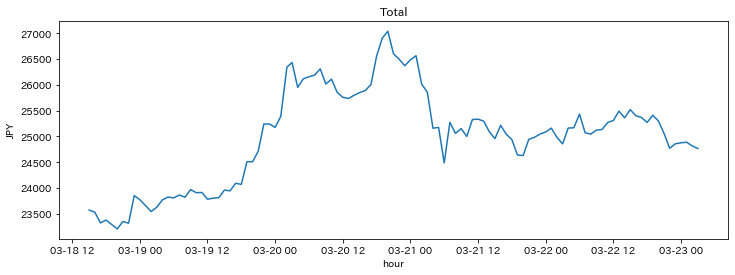

In [8]:
plt.plot(total_df.index, total_df['total_jpy'])
plt.xlabel("hour")
plt.ylabel("JPY")
plt.title('Total')
plt.show()

## 週次レポート

## 月次レポート